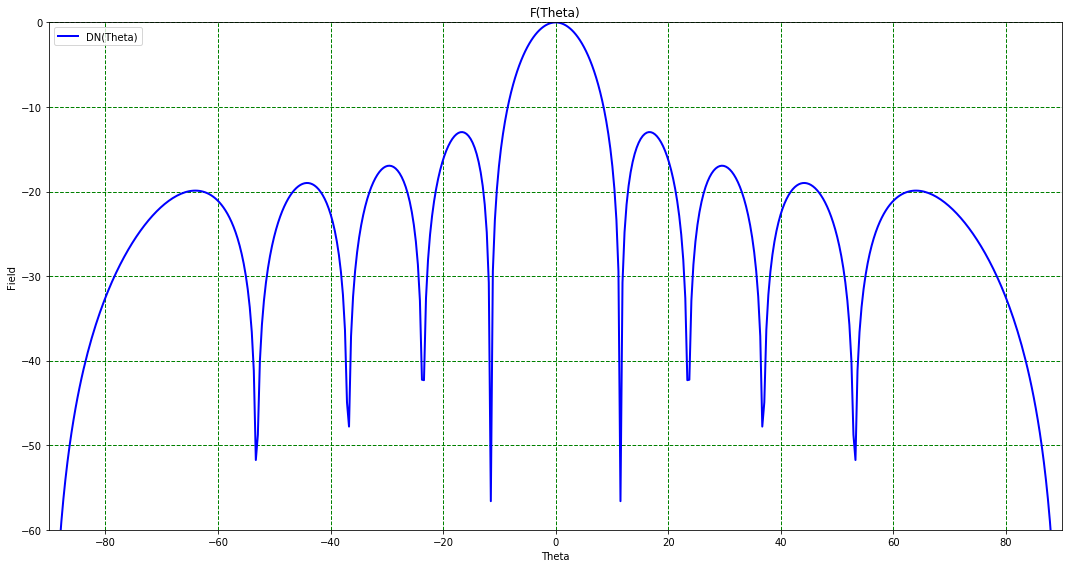

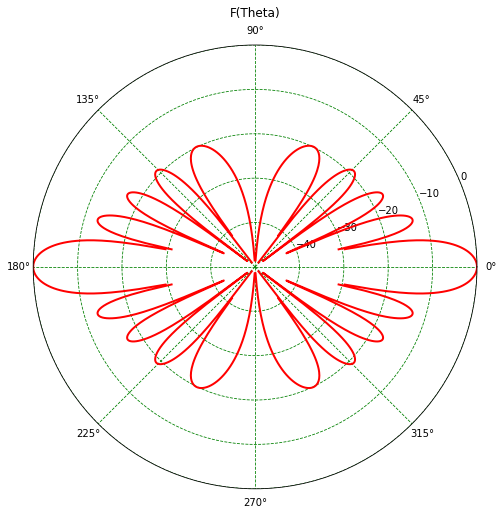

In [13]:
import numpy as np
from math import * #позволяет не писать в коде слово math перед функцией
import cmath
import matplotlib.pyplot as plt

from __future__ import division #всегда будет возвращать в качестве результата деления float.
'''
Если понадобится целочисленное деление, используйте оператор //
5//2 всегда возвращает 2.
'''

def LinearAntennaArrayDN(N, lmd, nn):
    # Параметры антенной решётки
    #N = 10
    #lmd = 3
    #nn = 400            # точность угла тета (число отсчётов)
    d = lmd/2            # шаг между элементами
    k = 2*pi/lmd    # волновое число
    theta = np.zeros(nn)
    DN = np.zeros(theta.size)

    for i in range(0, theta.size):
        theta[i] = i*2*pi/nn-pi
        summ = 0
        for x in range(0, N):
            summ += cmath.exp(-1j * k * x * d * sin(theta[i]))
            DN[i] = 20*log10(abs(summ)/N)
                
    return(DN, theta)

DN = LinearAntennaArrayDN(10, 3, 1000)
theta = DN[1]

#print(theta)


fig, ax = plt.subplots(figsize=(15, 8)) # figsize(,) задаёт размер картинки
ax.plot(theta*180/pi, DN[0], color="blue", linewidth=2, linestyle='-', label="DN(Theta)") #labels=['DN(Theta)', '-', '-'])
ax.set_title('F(Theta)')
ax.legend(loc='upper left')
ax.set_xlabel('Theta')
ax.set_ylabel('Field')
ax.grid(True)
ax.set_xlim(xmin=-90, xmax=90)    #ax.set_xlim(xmin=theta[0], xmax=theta[-1])
ax.set_ylim(ymin=-60, ymax=max(DN[0]))
ax.grid(True, axis='y', color='g', linewidth=1, linestyle='--')
ax.grid(True, axis='x', color='g', linewidth=1, linestyle='--')
fig.tight_layout()
  

fig2 = plt.figure(figsize=(20,20)) # зададим явно размер полотна, чтобы графики не перекрывались
ax2 = fig2.add_subplot(231, projection='polar')
ax2.plot(theta, DN[0], color='r', linewidth=2)
ax2.set_ylim(ymin=-50, ymax=max(DN[0]))
    # Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
    # Однако, будет разрыв между последней точкой и нулевой.
    # Чтобы его убрать, искусственно соединим эти точки.
    # Замыкаем (соединяем конец с началом)
#ax2.plot((theta[-1],theta[0]),(DN[-1],DN[0]), color='r', linewidth=1.)
ax2.grid(True, color='green', linestyle='--')
ax2.set_title("F(Theta)", loc='center')
plt.tight_layout()

